In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

1. 문제정의
- iris data에 scaler 사용

2. 데이터 수집
- iris 사용

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 데이터 전처리
- data 구조 확인
- scaling

In [3]:
x = iris.data
y = iris.target

In [7]:
len(x), len(y)

(150, 150)

In [8]:
# data set 크기
iris['data'].shape

(150, 4)

In [9]:
iris['target'].shape

(150,)

In [11]:
df = pd.DataFrame(x,columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df.columns = ['sepal length','sepal width','petal length','petal width']
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

In [31]:
# scaler 모델링, 학습, data 변환
scaler = MinMaxScaler()
scaler.fit(df)
x_scaled = scaler.transform(df)
scale_df = pd.DataFrame(x_scaled, columns=iris['feature_names'])
scale_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [34]:
scale_df.shape

(150, 4)

In [32]:
scaler1 = RobustScaler()
x_scaled1 = scaler1.fit_transform(df)
scale_df1 = pd.DataFrame(x_scaled1, columns=iris['feature_names'])
scale_df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333


4. EDA
- 시각화

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

<AxesSubplot:>

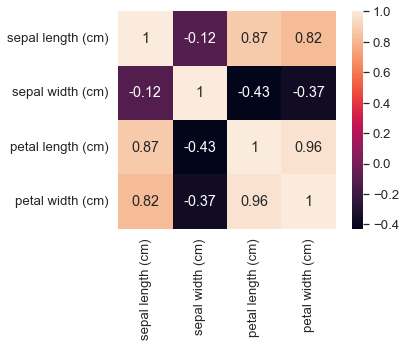

In [39]:
sns.heatmap(data=scale_df.corr(), square=True, annot=True)

In [40]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(scale_df, y, shuffle=True, random_state=0)

In [82]:
len(x_train), len(y_train)

(112, 112)

#### KNN, DT, SVM, 로지스틱 회귀

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [84]:
knn.score(x_test,y_test)

0.9736842105263158

In [85]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
acc

0.9736842105263158

Logistic Regression
- 분류 알고리즘
- 시그모이드 함수 : 0~1 사이의 값 -> 0보다 크면 1 작으면 -1, 각 분류 클래스에 속하게 될 확률값으로 사용
- 1에 가까우면 해당 클래스로 분류, 0에 가까우면 아니라고 분류

In [86]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train,y_train)
pred1 = logistic.predict(x_test)

In [87]:
print(logistic.score(x_test,y_test))
print(accuracy_score(y_test, pred1))

0.8947368421052632
0.8947368421052632


In [88]:
logistic.predict_log_proba(x_test)  # 각 클래스에 속할 확률값 예측

array([[-4.19303622, -1.39699007, -0.30440877],
       [-2.10913345, -0.36943874, -1.67379081],
       [-0.07881533, -2.68354145, -4.8970415 ],
       [-4.74236008, -1.42725793, -0.28592904],
       [-0.15056246, -2.03036512, -4.76905149],
       [-5.01027718, -2.03616511, -0.14756931],
       [-0.13598882, -2.13291365, -4.74949504],
       [-2.69492611, -0.87582638, -0.66177458],
       [-2.88641976, -0.74364083, -0.75748418],
       [-1.98765951, -0.59340589, -1.16943693],
       [-3.18060437, -0.69881785, -0.7737787 ],
       [-2.35410479, -0.85636199, -0.73330866],
       [-2.23519538, -0.58811734, -1.085725  ],
       [-2.76374629, -0.74475576, -0.77198557],
       [-2.41459545, -0.6978926 , -0.88439585],
       [-0.10356602, -2.37667267, -5.19856832],
       [-2.38949217, -0.71979752, -0.86399968],
       [-1.98807149, -0.50084969, -1.35858119],
       [-0.21476577, -1.6971091 , -4.59946507],
       [-0.11772395, -2.30604028, -4.47383388],
       [-3.25359035, -0.98826472, -0.529

Decision Tree
- 의사결정나무 모델은 트리 알고리즘을 사용
- 트리의 각 분기점(node)에는 데이서 set의 feature를하나씩 위치시킴
- 각 노드에서 해당 피처에 관해서 임의의 조건식을 가지고 계속 2개 이상의 줄기로 가지를 나누면서 data를 구분함
- 각 노드에서 분류가 가장 잘 되는 최적의 기준을 찾는 과정이 중요
- hyper parameter가 많기 때문에 과대적합 방지

In [95]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(x_train, y_train)
tree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [96]:
print(tree.score(x_test, y_test))
print(accuracy_score(y_test, tree.predict(x_test)))

0.9736842105263158
0.9736842105263158


SVM
- data set의 각 feature(열) 벡터들이 고유의 축을 갖는 벡터 공간을 이룬다고 가정
- 모든 data를 벡터 공간 내의 좌표에 점으로 표시하고, 각 data가 속하는 목표 클래스(label)별로 나뉜다
- hyper plane, support vector, margin
- hyper parameter
    - C(이상치) : hard margin(C값 높음: 허용X) / soft margin(C값 낮음: 허용)
    - gamma(data의 영향 범위) : 결정경계 곡류 결정
    - kernel : 'linear', 'poly', 'rbf'

In [99]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
pred2 = svc.predict(x_test)
print(svc.score(x_test,y_test))
print(accuracy_score(y_test, pred2))

0.9736842105263158
0.9736842105263158
